In [79]:
import cv2
import os
import random
import numpy as np
import matplotlib.pyplot as plt

from superpoint.settings import EXPER_PATH, DATA_PATH
import superpoint.evaluations.detector_evaluation as ev
from utils import plot_imgs
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
export_name = 'magic-point_coco-export1/'
export_dir = EXPER_PATH + '/outputs/' + export_name
examples_per_row = 4
rows_of_examples = 4

coco_size = (320, 240)

In [92]:
coco_export_files = os.listdir(export_dir)

In [101]:
def draw_pts_on_img(img, pts):
    keypoints = [cv2.KeyPoint(p[1], p[0], 1) for p in np.stack(pts)]
    img_resize = np.zeros(coco_size)
    img_resize = cv2.resize(img, coco_size)
    return cv2.drawKeypoints(img_resize.astype(np.uint8), keypoints, None, (0, 255, 0))

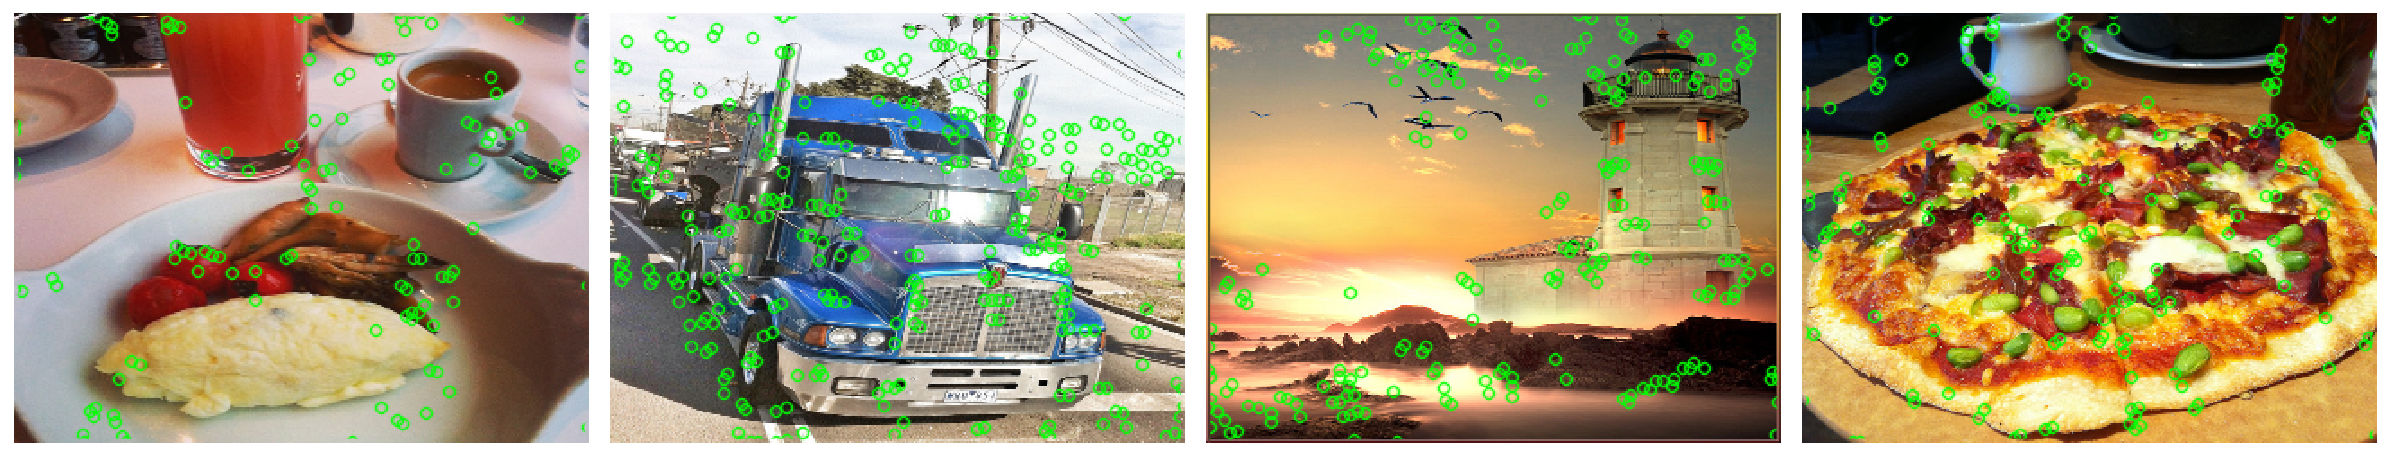

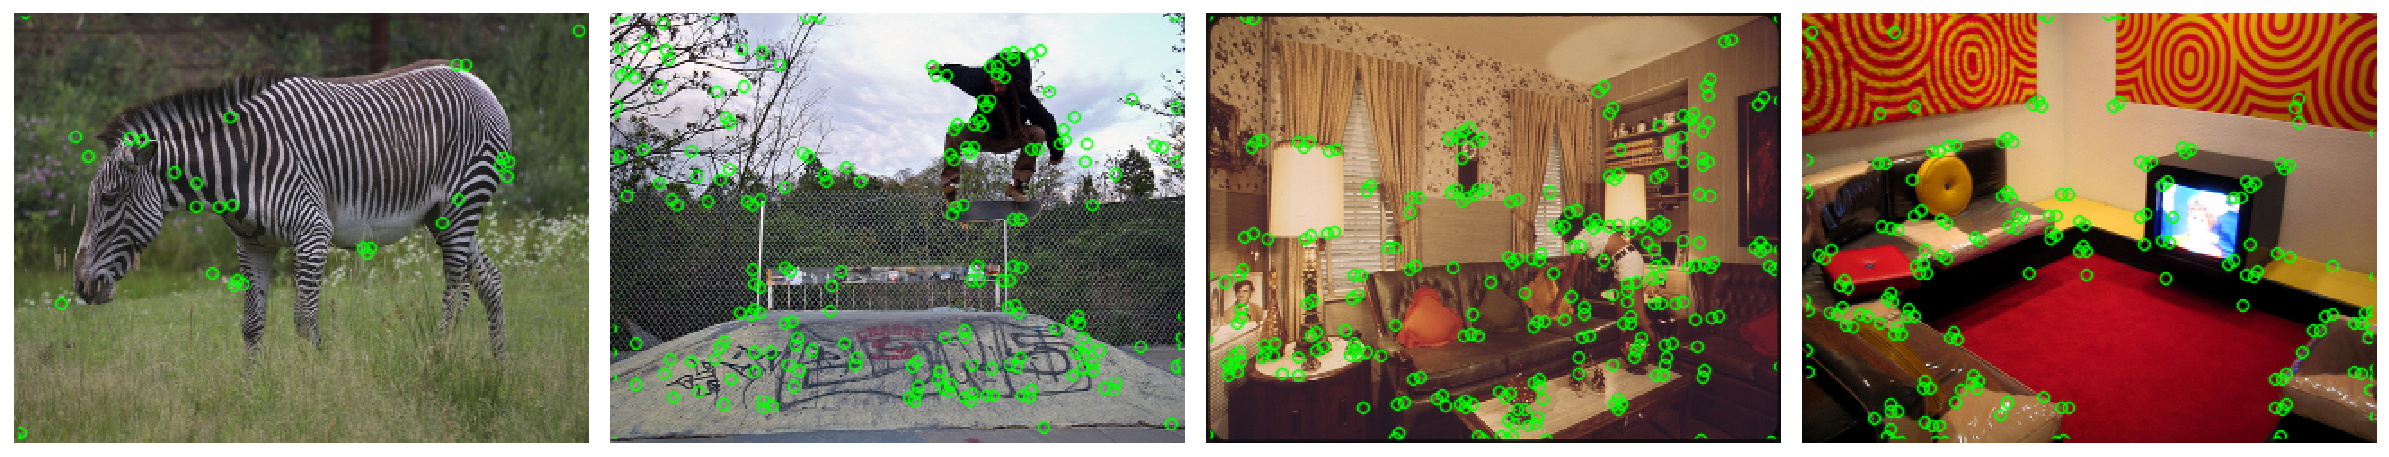

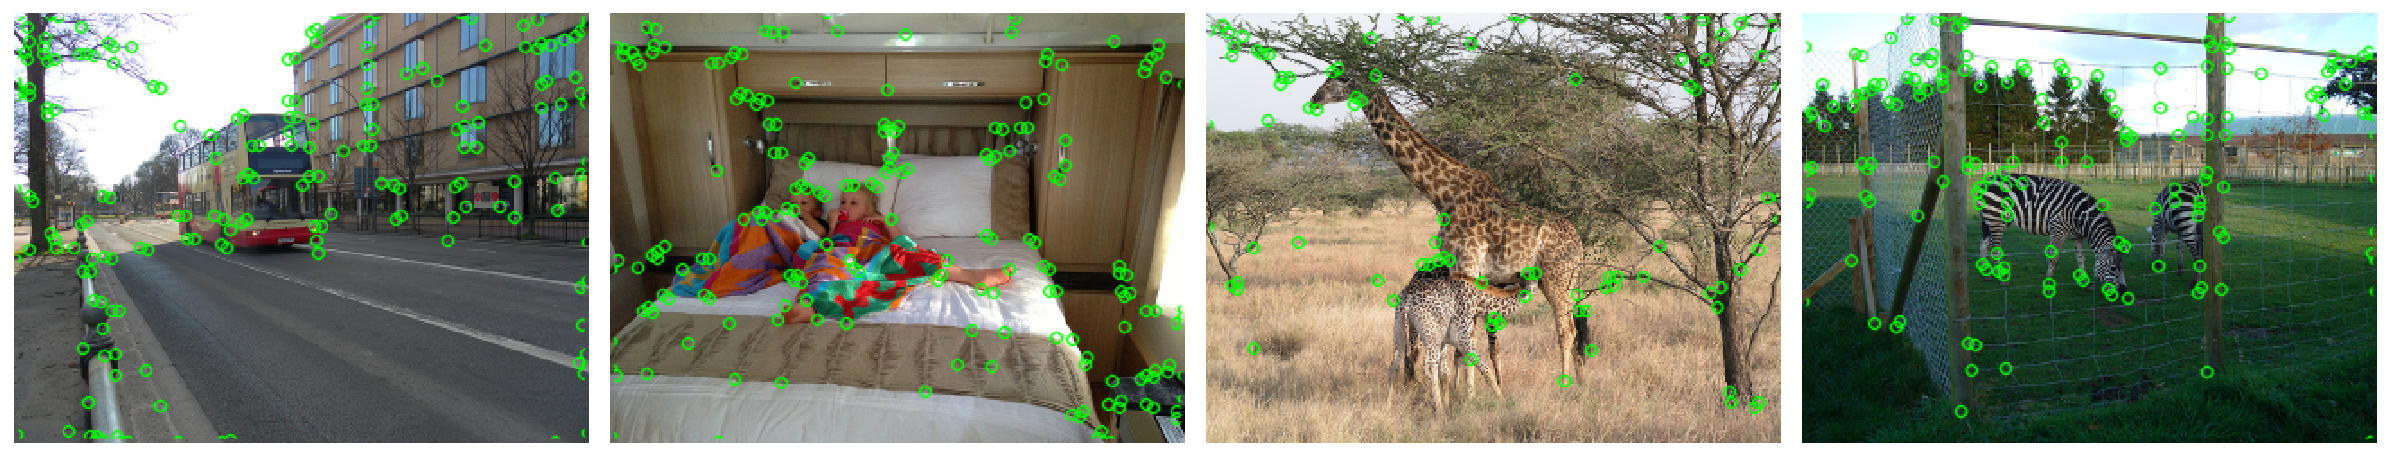

In [102]:
for i in range(rows_of_examples):
    img_to_show = []
    for j in range(examples_per_row):
        coco_export_file = random.choice(coco_export_files)
        coco_name = os.path.splitext(coco_export_file)[0]

        output_file = export_dir + coco_export_file
        with np.load(output_file) as data:
            pts = data['points']

        # Show image
        img_file = DATA_PATH + '/COCO/train2014/' + coco_name + '.jpg'
        img = cv2.imread(img_file)
        img_w_pts = draw_pts_on_img(img, pts)
        img_to_show.append(img_w_pts)
    plot_imgs(img_to_show)